<a href="https://colab.research.google.com/github/DwiIra/UAS_Kecerdasan-Komputasional/blob/main/UAS_KK_23422042_DWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4375 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.5625 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6250 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7500 - loss: 0.6899 - val_accuracy: 0.7500 - val_loss: 0.6925
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8750 - loss: 0.6869 - val_accuracy: 0.7500 - val_loss: 0.6925
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9375 - loss: 0.6850 - val_accuracy: 0.2500 - val_loss: 0.6926
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.6822 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 9/2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


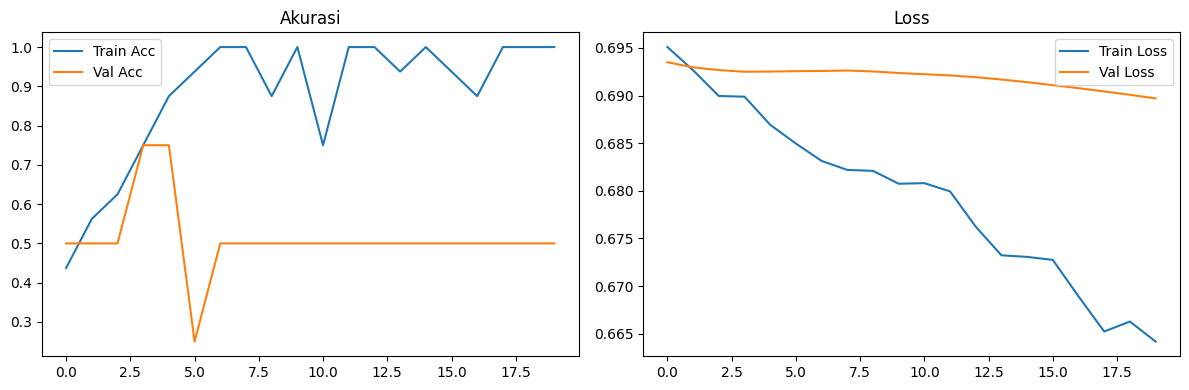

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. DATASET (Minimal 20 Data)
# Label: 1 = Asli, 0 = Hoaks
texts = [
    "Presiden mengumumkan bantuan resmi untuk korban banjir",
    "Aktor terkenal meninggal karena kecelakaan pesawat",
    "Ilmuwan menemukan vaksin untuk virus baru",
    "Ini adalah hoaks tentang chip dalam vaksin",
    "Pemerintah tidak akan memungut pajak baru",
    "Hoaks! Minum air garam bisa sembuhkan covid",
    "Sekolah tatap muka dimulai minggu depan",
    "Waspada! Alien telah mendarat di Jakarta",
    "Bank Indonesia umumkan suku bunga naik",
    "Hoaks: Jus lemon bisa sembuhkan kanker",
    "Festival budaya akan diadakan di Bali",
    "Berita palsu: Presiden digantikan robot",
    "Petani panen raya padi di Jawa Tengah",
    "Vaksin menyebabkan autisme adalah hoaks",
    "Menteri pendidikan umumkan kurikulum baru",
    "Makan pisang bisa menyembuhkan diabetes adalah hoaks",
    "Gubernur resmikan jembatan penghubung baru",
    "Hoaks: Garam bisa mengusir roh jahat",
    "KPU umumkan hasil resmi pemilu",
    "Berita palsu: Laut akan berubah menjadi merah"
]

labels = [1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

# 2. Preprocessing
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=20)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# 4. Build CNN Model
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=20),
    Conv1D(32, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train Model
history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=20, validation_data=(np.array(X_test), np.array(y_test)))

# 6. Evaluation
y_pred = model.predict(np.array(X_test))
y_pred_classes = (y_pred > 0.5).astype("int32")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# 7. Plot Accuracy & Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
